In [8]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from task2.optimization import conjugate_gradients, hessian_free_newton, lbfgs
from task2.oracles import LogRegL2Oracle, QuadraticOracle, create_log_reg_oracle
from task1.optimization import gradient_descent, newton
from utils.plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
from ipywidgets import FloatProgress
from IPython.display import display

## Эксперимент 1

success
1.0


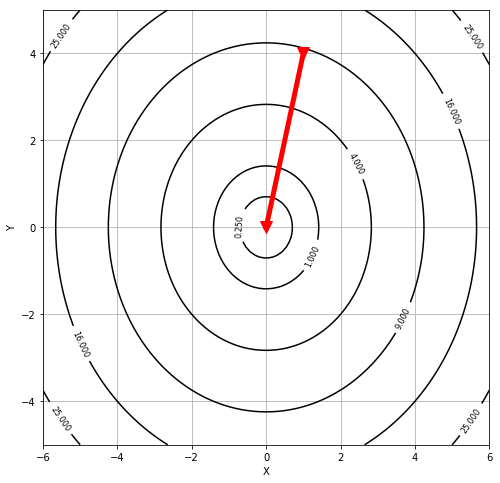

In [8]:
A = array([[1, 0], [0, 1]])
b = array([0, 0])
quadratic = QuadraticOracle(A, b)
x0 = array([1, 4])
x, message, history = conjugate_gradients(
        quadratic, x0,
        trace=True,
        line_search_options={
            'method': 'Armijo',
            'alpha_0': 1,
            'c1': 1e-4,
            'c2': 0.9,
            'c' : 0.1
            
        }
    )
print(message)
print(linalg.cond(A))
figure(figsize=(8, 8))
plot_levels(quadratic.func)
plot_trajectory(quadratic.func, history=history['x'])
xlabel("X")
ylabel("Y")

In [18]:
A = rand(100, 100)
b = rand(100)
x0 = ones(100)
x, message, history = conjugate_gradients(lambda v: A.dot(v), b, x0, trace=True)

In [21]:
len(history["time"])

102

## Эксперимент 2

In [22]:
A_gisette, b_gisette = load_svmlight_file("datasets/gisette_scale")
logreg_gisette = create_log_reg_oracle(A_gisette, b_gisette, regcoef=1/A_gisette.shape[0])
x0 = np.zeros(A_gisette.shape[1])
g0 = logreg_gisette.grad(x0)

In [25]:
%%time

lbfgs_lengths = (0, 1, 5, 10, 50, 100)

progressbar = FloatProgress()
progressbar.max = len(lbfgs_lengths) - 1
display(progressbar)

histories = []
for l in lbfgs_lengths:
    x, message, history = lbfgs(logreg_gisette, x0, memory_size=l, trace=True)
    histories.append(history)
    progressbar.value += 1

CPU times: user 9min 29s, sys: 17.7 s, total: 9min 47s
Wall time: 6min 45s


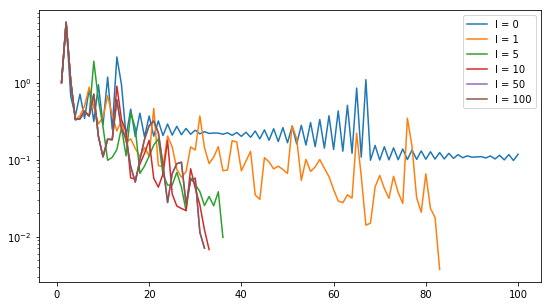

In [32]:
figure(figsize=(9, 5))
for l, history in zip(lbfgs_lengths, histories):
    semilogy(range(1, len(history['grad_norm']) + 1)[:100], history['grad_norm'][:100]/norm(g0), label = "l = %d"%l)
legend()

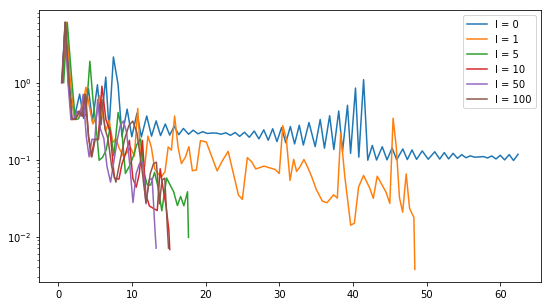

In [33]:
figure(figsize=(9, 5))
for l, history in zip(lbfgs_lengths, histories):
    semilogy(history['time'][:100], history['grad_norm'][:100]/norm(g0), label = "l = %d"%l)
legend()

## Эксперимент 3

In [12]:
A_w8a, b_w8a = load_svmlight_file("datasets/w8a.txt")
logreg_w8a = create_log_reg_oracle(A_w8a, b_w8a, regcoef=1/A_w8a.shape[0])
x0 = np.zeros(A_w8a.shape[1])
g0 = norm(logreg_w8a.grad(x0))
x_w8a_n, message_w8a_n, history_w8a_n = hessian_free_newton(logreg_w8a, x0, trace=True)

AttributeError: 'LogRegL2Oracle' object has no attribute 'hess_vec'